In [15]:
import os
import numpy as np
from os.path import join
import mne
import matplotlib.pyplot as plt
import scipy
from pyxdf import resolve_streams
import mne
from mnelab.io.readers import read_raw

In [16]:
# load the synchronized intracranial file
filepath = "C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\DATA\\sub017\\synced_data\\test saving additional channel"
lfp_fname = "SYNCHRONIZED_INTRACRANIAL_CLEANED_sub-017_ses-Fu01mMedOn01_task-MSST_StimOnB-BrainSenseBip_run-1.set"
lfp_file = join(filepath, lfp_fname)
synced_lfp = mne.io.read_raw(lfp_file, preload=True)

# load the synchronized EEG file
eeg_fname = "SYNCHRONIZED_EXTERNAL_sub-017_ses-mSST_ON_task-Default_run-001_eeg.set"
eeg_file = join(filepath, eeg_fname)
synced_eeg = mne.io.read_raw(eeg_file, preload=True)

# load the non-synchronized lsl file
eeg_filepath_raw = "C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\DATA\\sub017\\raw_data\\XDF\\DBS ON"
eeg_fname_raw = "sub-017_ses-mSST_ON_task-Default_run-001_eeg.xdf"
eeg_file_unsynced = join(eeg_filepath_raw, eeg_fname_raw)
# Load the .xdf file using the read_raw function
"""Find the EEG stream in the .xdf file."""
xdf_datas = resolve_streams(eeg_file_unsynced)
streams_dict = {stream['name']: stream['stream_id'] for stream in xdf_datas}
stream_id = streams_dict.get('SAGA')
raw_eeg_unsynced = read_raw(eeg_file_unsynced, stream_ids=[stream_id], preload=True)


In [3]:
synced_eeg.ch_names

['CREF',
 'Fp1',
 'Fpz',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'M1',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'M2',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'POz',
 'O1',
 'Oz',
 'O2',
 'BIP 01',
 'BIP 02',
 'BIP 03',
 'X',
 'Y',
 'Z',
 'TRIGGERS',
 'STATUS',
 'COUNTER']

In [4]:
bip_synced = synced_eeg.pick(['BIP 01'])
bip_array_synced = bip_synced.get_data()[0]
timescale_bip_synced = synced_eeg.times

In [5]:
%matplotlib qt
plt.plot(timescale_bip_synced, bip_array_synced)

Using matplotlib as 2D backend.


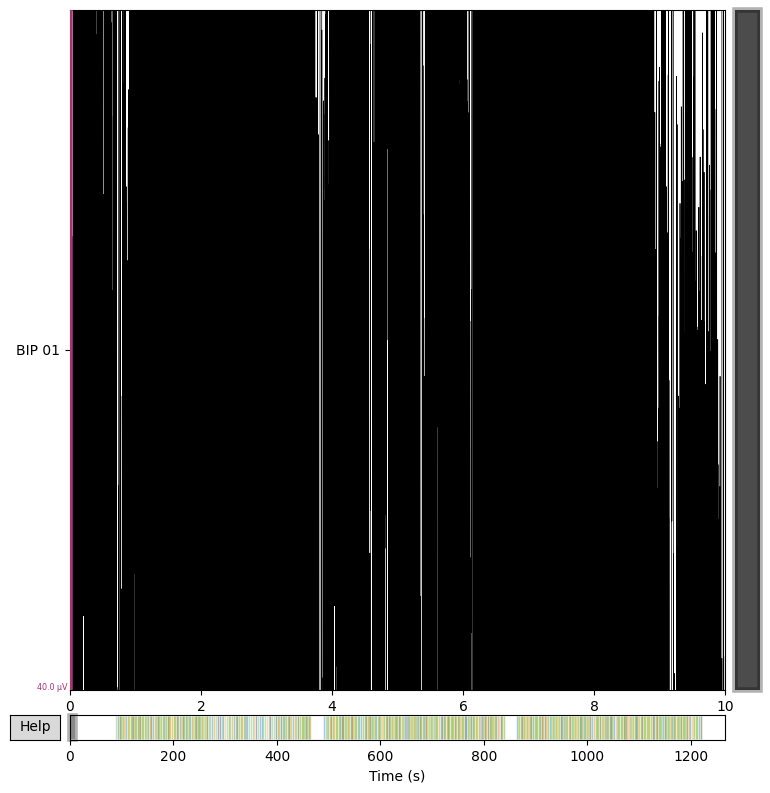

Channels marked as bad:
none


In [ ]:
bip_synced.plot()

# First event 'GO' is at ~89s, sync pulse is at 1s

In [7]:
raw_eeg_unsynced.ch_names

['CREF',
 'Fp1',
 'Fpz',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'M1',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'M2',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'POz',
 'O1',
 'Oz',
 'O2',
 'BIP 01',
 'BIP 02',
 'BIP 03',
 'X',
 'Y',
 'Z',
 'TRIGGERS',
 'STATUS',
 'COUNTER']

In [8]:
bip_unsynced = raw_eeg_unsynced.pick(['BIP 01'])
bip_array_unsynced = bip_unsynced.get_data()[0]
timescale_bip_unsynced = raw_eeg_unsynced.times

In [ ]:
%matplotlib qt
plt.plot(timescale_bip_unsynced, bip_array_unsynced)

# First sync pulse at ~6.93s

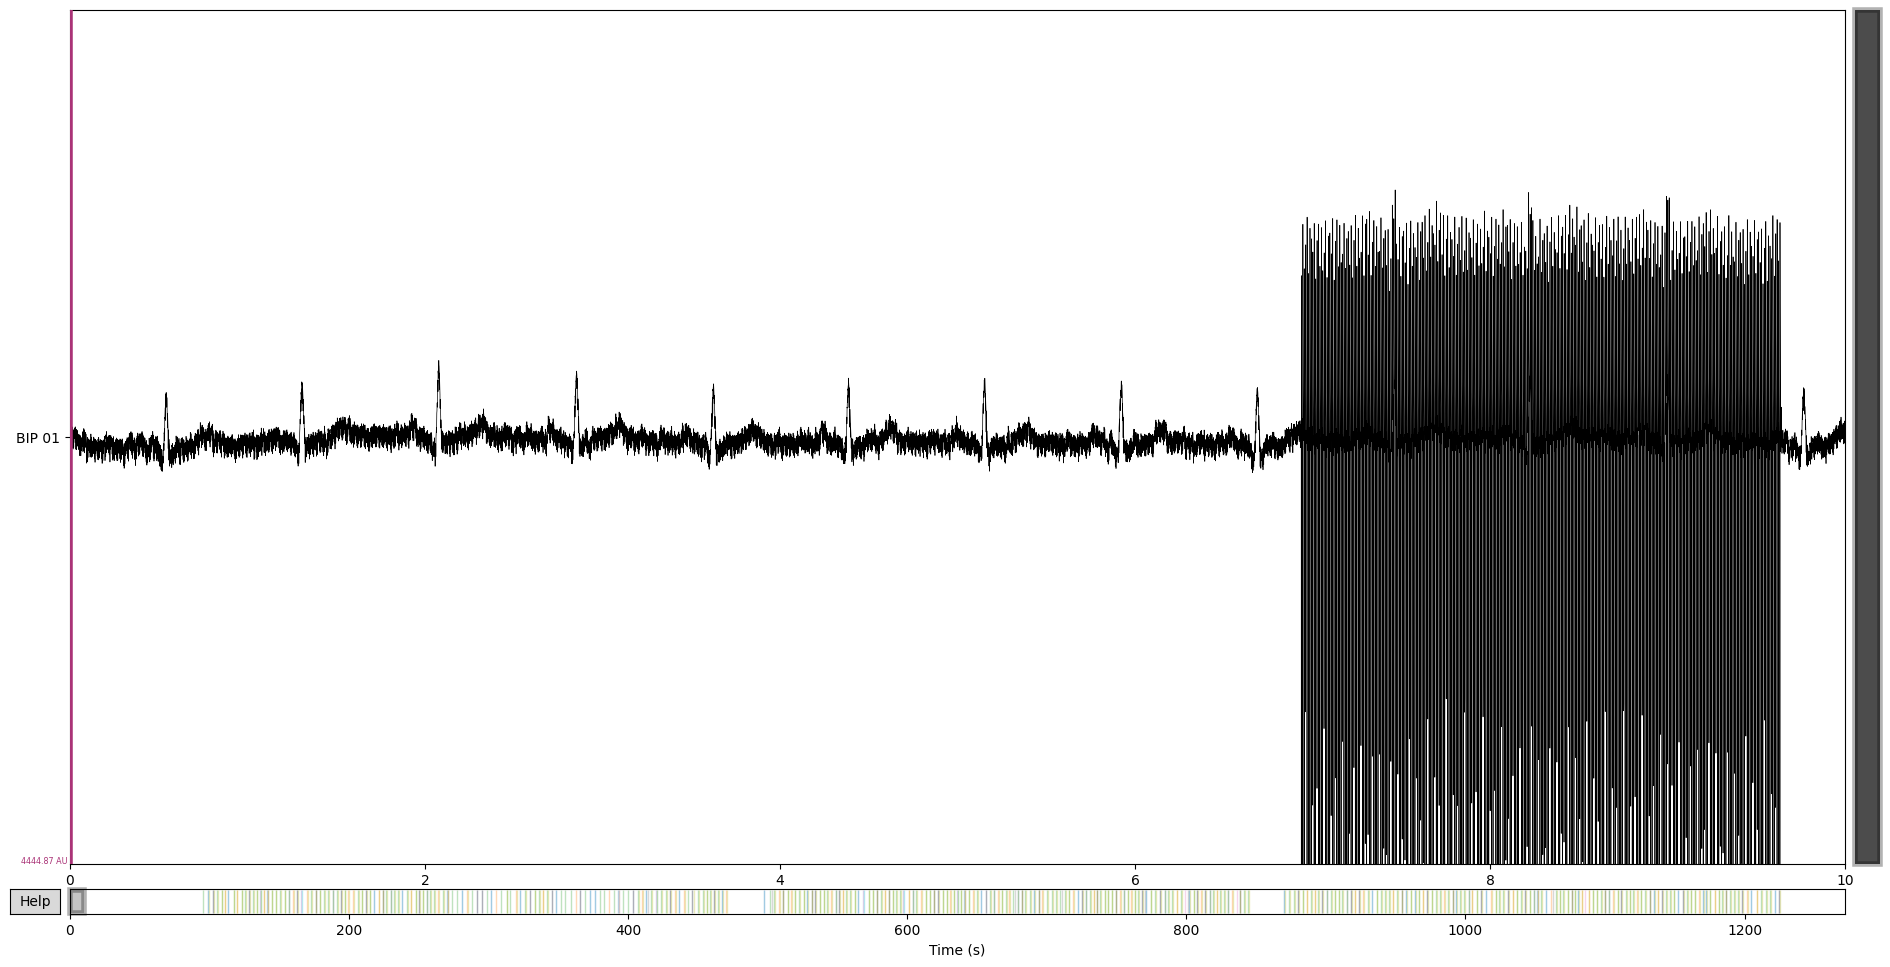

Channels marked as bad:
none


In [ ]:
bip_unsynced.plot()

# First event 'GO' is at ~95s

In [17]:
synced_lfp.ch_names

['LFP_Stn_L_02',
 'LFP_Stn_R_02',
 'LFP_Stn_L_02_PEAK18Hz_THR20-30_AVG3000ms',
 'LFP_Stn_R_02_PEAK24Hz_THR20-30_AVG3000ms',
 'STIM_L_125Hz_60us',
 'STIM_R_125Hz_60us',
 'RAW_Left_STN',
 'RAW_Right_STN']

In [18]:
synced_lfp.info

<Info | 7 non-empty values
 bads: []
 ch_names: LFP_Stn_L_02, LFP_Stn_R_02, ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

In [5]:
raw_lfp = synced_lfp.pick(['LFP_Stn_L_02'])
raw_lfp_array = raw_lfp.get_data()[0]
timescale_raw_lfp = synced_lfp.times

In [13]:
raw_lfp_add_channel = synced_lfp.pick(['RAW_Left_STN'])

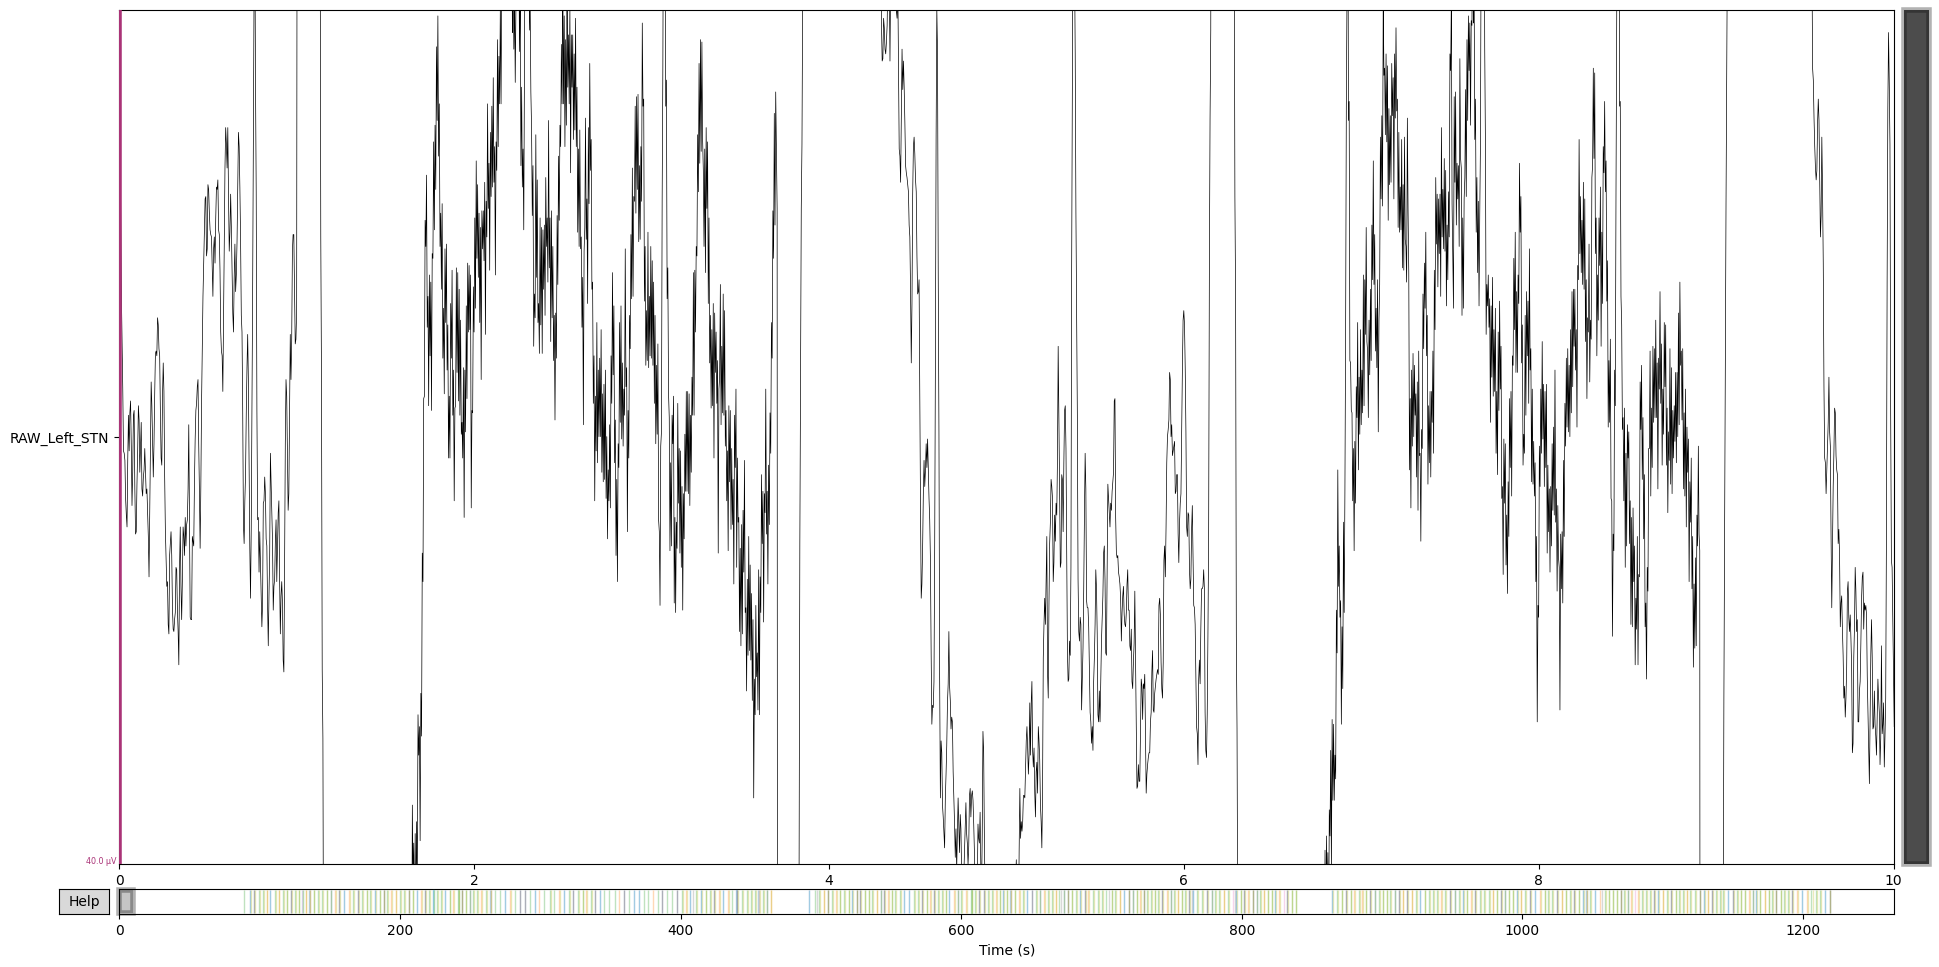

Channels marked as bad:
none
Channels marked as bad:
none


In [14]:
%matplotlib qt
raw_lfp_add_channel.plot()

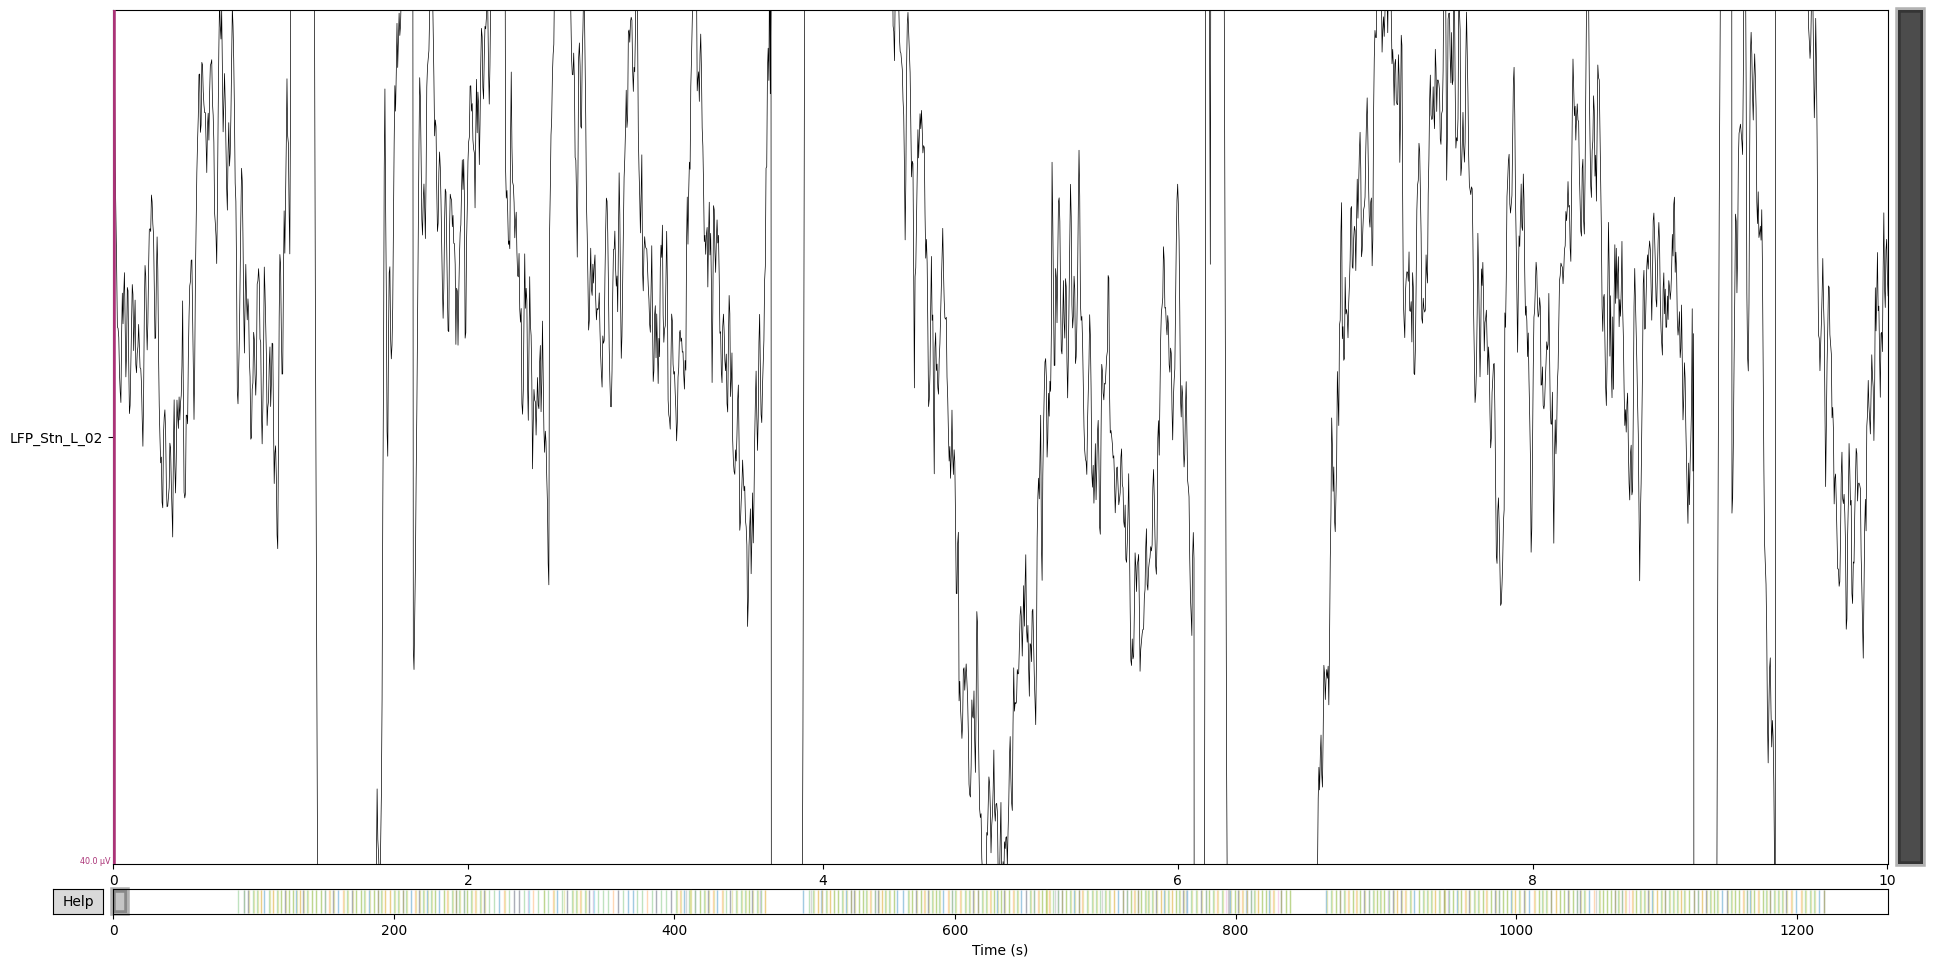

In [7]:
%matplotlib qt
raw_lfp.plot()

# First event 'GO' is at ~89s, pulse is at 1s